In [1]:
import tweepy

global api
consumer_key        = "2KVTe3bF62SX6e9xiUjrAXefy"
consumer_secret     = "sJI0rZPBE7BYHtd2QtzINwzKjrfd38Pl5WRC6ejr9dVUTKEN9r"
access_token        = "106638836-m9aD0K0mmMVHfvNBbg2kn4VD1imhLEcdOfNkRMby"
access_token_secret = "LFNeadXggcxztcCRun8AYMCVfgDu8wdM1wjs3gNHgsoiZ"
auth                = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api                 = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)


In [131]:
# words       = "saya selalu benar dan tidak mau tahu dengan keadaan yang di sekitar saya"
# stop_words  =  ["saya", "dan", "dengan", "yang", "di", "pokoknya", "keluar"]
# words_list  = words.split(" ")
# cleaned     = set(words_list) ^ set(stop_words)
# print(" ".join(list(cleaned)))
import re, string, json, csv, hashlib, requests

emotion = ['marah', 'sedih', 'senang', 'takut', 'khawatir']
sinonim = {}
for emosi in emotion:
    kamus_endpoint = "https://kateglo.com/api.php?format=json&phrase={keyword}".format(keyword=emosi)    
    response = requests.get(kamus_endpoint, verify=False)
    synonim = response.json()['kateglo']['relation']['s']    
    sinonim[emosi] = []
    for index, data in synonim.items():
        try:
#             print(data['related_phrase'])
            sinonim[emosi].append(data['related_phrase'])
        except:
            pass
#         sinonim[emosi].append(data['related_phrase'])
print(sinonim)
        

/home/patrick/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/home/patrick/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/home/patrick/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/home/patrick/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: In

{'marah': ['berang', 'gusar', 'terbakar', 'muring', 'gemas', 'makan bawang', 'sirap hati', 'merah', 'meruok', 'geram', 'bertelinga merah', 'benci', 'kecil hati', 'sewot', 'palak', 'membawang', 'tersirap hatinya', 'meraba', 'dendam', 'emosi', 'mencak-mencak', 'rampang', 'dengki', 'berangsang', 'bengis', 'menyangkak', 'didih', 'nafsu', 'radang', 'merah telinga'], 'sedih': ['duka', 'isak', 'sedu', 'tersentuh (perasaan)', 'muram', 'derita', 'kuyu', 'galaba', 'lara', 'gelebah', 'senak', 'haru', 'larat hati', 'remuk redam', 'gobar hati', 'pedih', 'susah', 'iba', 'terista', 'gundah', 'lemas', 'susah hati', 'masygul', 'benguk', 'berkabut', 'putus tali gantung', 'melankolis', 'dayuh', 'nelangsa', 'enas', 'terdayuh'], 'senang': ['betah', 'gembira', 'mudah', 'praktis', 'sayang', 'suka', 'tenteram', 'jilah kening', 'girang', 'naim', 'sukacita', 'makmur', 'nikmat', 'aman', 'asyik', 'lapang', 'bahagia', 'demen', 'ceria', 'marem', 'ringan', 'sejuk', 'doyan', 'jidur', 'sejuk hati', 'gemar'], 'takut': 

In [118]:


from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

listStopword       = set(stopwords.words('indonesian'))
custom_stop_words  = ['gak', 'ga','kl', 'tdk', 'yg', 'hrs', 'utk', 'dg', 'dgn', 'tp', 'nya', 'dgn', 'udah', 'dah',
                     'sih', 'nih', 'kan', 'enggak', 'lha', 'nah', 'tuh', 'nya', 'yg', 'yuk', 'gw', 'gue', 'gua', 'guwa',
                     'pantes', 'kuy', 'sip', 'bro', 'sis', 'plis', 'ya', 'kalo', 'klw', 'klo', 'aja', 'say', 'sy',
                     'cyin', 'cin', 'skrg', 'drpd', 'timbang', 'ngga', 'oh', 'lho', 'kok', 'kek', 'kayak', 'lg', 'nak',
                     'ni', 'dkt', 'deket', 'nggak', 'kagak', 'ttp', 'teteup', 'moga', 'tu', 'bgt', 'banget', 'gengs', 
                     'gaes', 'guys', 'cuy', 'dpt', 'gaada', 'awan', 'duh', 'dr', 'karna']

geo = '-6.2115,106.8452,2500km'

listStopwordFinal  = listStopword|set(custom_stop_words)
# fetched_tweets = api.search("Lockdown Indonesia -filter:retweets&verified", count = 1500, lang="id")
fetched_tweets = tweepy.Cursor(api.search, q='lockdown indonesia -filter:retweets', geocode=geo, lang="id", tweet_mode='extended').items(300)
# ps = PorterStemmer() 
factory = StemmerFactory()
stemmer = factory.create_stemmer()
# fetched_tweets = tweepy.Cursor(api.search, q=str("COVID19"), count=20, lang="id", verify=False).items()

# print(listStopwordFinal)
search_keyword = ["lockdown", "indonesia"]

def levenshtein(seq1, seq2):
    size_x = len(seq1) + 1
    size_y = len(seq2) + 1
    matrix = np.zeros ((size_x, size_y))
    for x in xrange(size_x):
        matrix [x, 0] = x
    for y in xrange(size_y):
        matrix [0, y] = y

    for x in xrange(1, size_x):
        for y in xrange(1, size_y):
            if seq1[x-1] == seq2[y-1]:
                matrix [x,y] = min(
                    matrix[x-1, y] + 1,
                    matrix[x-1, y-1],
                    matrix[x, y-1] + 1
                )
            else:
                matrix [x,y] = min(
                    matrix[x-1,y] + 1,
                    matrix[x-1,y-1] + 1,
                    matrix[x,y-1] + 1
                )
    print (matrix)
    return (matrix[size_x - 1, size_y - 1])

def remove_noise(string):
    # and all(ord(c) < 128 for c in word) \
    words           = string.lower().strip().split(' ')
    return_words    = []    
    for word in words:
        word = word.rstrip().lstrip()
        if word == 'rt':
            index = words.index(word)+1
            words.remove(words[index])
            
        if not re.match(r'^https?:\/\/.*[\r\n]*', word) \
        and not re.match('^@.*', word) \
        and not re.match('\s', word) \
        and '@' not in word \
        and 'https' not in word \
        and 'http' not in word \
        and word not in search_keyword \
        and word != 'rt' \
        and word != '':
            return_words.append(word)        
    return ' '.join(return_words)

def remove_stopword(string):
    removed = []
    string  = stemmer.stem(string)
    tokenized = word_tokenize(string)
#     tokenized = string.split(" ")
    for t in tokenized:
#         t = ps.stem(t)        
        if t not in listStopwordFinal:            
            removed.append(t)
    return " ".join(removed)

i = 0;
final_data  = []
added_tweet = []
for tweet in fetched_tweets:        
        print(tweet.full_text)
        parsed_tweet = {}        
#         place_id = places[0].id
#         text_asli         = tweet.full_text.translate(str.maketrans('','',string.punctuation)).lower()
        text_asli         = tweet.full_text.lower()
        if tweet.coordinates is not None:
            print(tweet.coordinates)
        hashed_tweet      = hashlib.md5(text_asli.encode('utf-8')).hexdigest()
        
        if hashed_tweet not in added_tweet:        
            added_tweet.append(hashed_tweet)
            removed_noise     = remove_noise(text_asli)        
            removed_stopwords = remove_stopword(removed_noise)
            final_data.append([text_asli, removed_noise, removed_stopwords])

try:
    f = open("lockdown_twitter.csv", "x")    
except:
    pass


f = open('lockdown_twitter.csv', 'r+')
f.truncate(0)
f.close()

# print(final_data)
with open('lockdown_twitter.csv', mode='w', newline='') as tweet_data:
    fieldnames = ['text_asli', 'removed_noise', 'removed_stopwords']
    writer = csv.DictWriter(tweet_data, fieldnames=fieldnames)
    writer.writeheader()
    for item in final_data:        
        writer.writerow({'text_asli':item[0], 'removed_noise':item[1], 'removed_stopwords': item[2]})
            
#         if "http" not in tweet.text:
#             line = re.sub("[^A-Za-z]", " ", tweet.text)
#             target.write(line+"\n")

@KhuDaud @susipudjiastuti Indonesia agak sedikit sulit untuk menerapkan sistem lockdown,
@Amen_konggo @Engkansyahroni @baktipraa_ @unyu_tini @xxx_edwar @nuramin39 @susipudjiastuti Ya asal luas dan jumlah penduduk indonesia sama dengan filipina malaysia saya rasa tidak terlalu menjd beban berat. Dan ngomong2 malysia juga cuma pembatasan saja ga sampai lockdown.
Sama buat pemerintah @jokowi dan jajarannya. Terimakasih sdh bekerja keras, maaf kalo kami bisanya cuma teriak lockdown terus di medsos, saya yakin bapak punya pandangan lebih jauh soal Indonesia.

Besok besok, harus lebih waspada + kalo berhasil 1 jangan buru buru selebrasi.
lockdown bukan budaya indonesia
budaya kita lockdown perasaan terhadap org yg disuka dalem2 trus ngomel2 kenapa jomblo
hei warga Indonesia. Presiden menginstruksikan untuk tidak akan memberlakukan lockdown itu artinya beliau menyerahkan mandat untuk rakyat berpikir cerdas, membatasi gerak, melalui apa? SOCIAL DISTANCING. semua lapisan masyarakat harus sadar 

KeyboardInterrupt: 

In [88]:
import pandas as pd

df = pd.read_csv('lockdown_twitter.csv', index_col=None, header=0)
df['removed_stopwords'].fillna(df['removed_noise'], inplace=True)
df.head(11)

,text_asli,removed_noise,removed_stopwords
0,sama buat pemerintah @jokowi dan jajarannya. t...,sama buat pemerintah dan jajarannya. terimakas...,perintah jajar terimakasih sdh kerja keras maa...
1,lockdown bukan budaya indonesia\nbudaya kita l...,bukan budaya indonesia\nbudaya kita perasaan t...,budaya indonesia budaya asa hadap org suka dal...
2,hei warga indonesia. presiden menginstruksikan...,hei warga indonesia. presiden menginstruksikan...,hei warga indonesia presiden instruksi laku ar...
3,"cukup indonesia yang #lockdown karna corona ,h...","cukup yang #lockdown karna corona ,hati kamu j...",lockdown karna corona hati
4,@prfmnews setuju #tolaklockdown karena kondisi...,setuju #tolaklockdown karena kondisi geografis...,tuju tolaklockdown kondisi geografis sosial ek...
5,"intinya lagi, dia membenarkan indonesia tidak ...","intinya lagi, dia membenarkan tidak harus mene...",inti terap total terap parsial social distancing
6,"nah, dia menyangkut pautkan dengan konsep lock...","nah, dia menyangkut pautkan dengan konsep yg h...",sangkut paut konsep ngelakuin
7,"daerah gue udah lockdown total, tetangga deket...","daerah gue udah total, tetangga deket rumah ad...",daerah total tetangga rumah tinggal alhasil ma...
8,kita orang gajian aja masih harus pinter2 nyis...,kita orang gajian aja masih harus pinter2 nyis...,orang gaji pinter2 nyisihin karna cuman gimana...
9,@jokowi bapak presiden saya punya saran dan ma...,"bapak presiden saya punya saran dan masukan , ...",presiden saran masuk rakyat usul laku pakk ora...


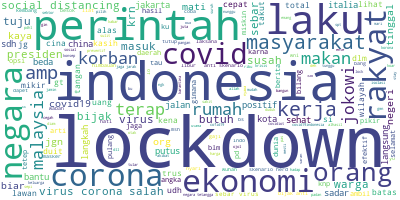

In [89]:
# Import the wordcloud library
# print(df['removed_stopwords'].values)
from wordcloud import WordCloud

df.drop(df.index[8])
# Join the different processed titles together.
long_string = ','.join(list(df['removed_stopwords'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

[('lockdown', 140.0),
 ('indonesia', 76.0),
 ('corona', 47.0),
 ('perintah', 45.0),
 ('negara', 42.0),
 ('laku', 40.0),
 ('ekonomi', 38.0),
 ('rakyat', 34.0),
 ('virus', 34.0),
 ('19', 31.0)]

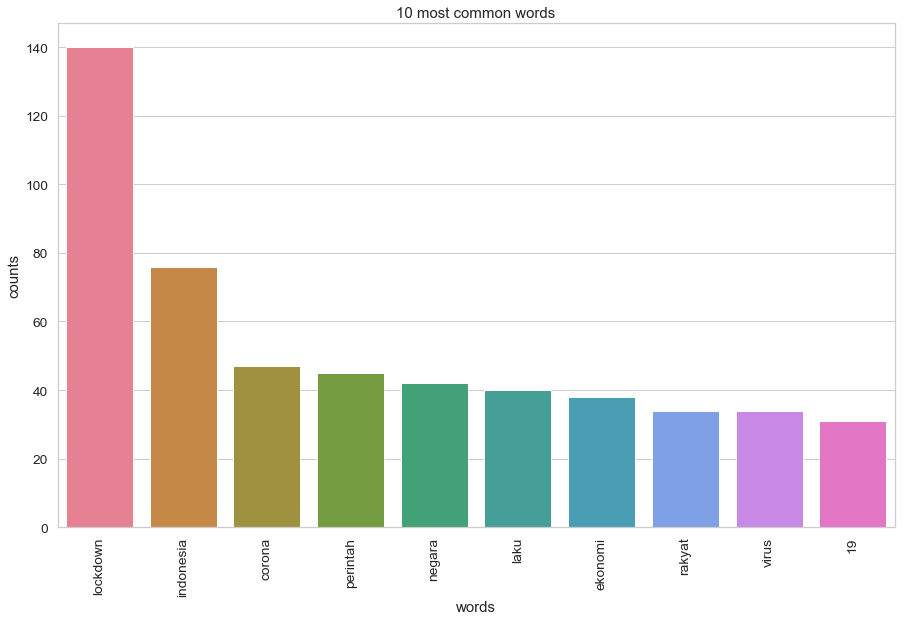

In [90]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words        = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    display(count_dict)
    words      = [w[0] for w in count_dict]
    counts     = [w[1] for w in count_dict]
    x_pos      = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['removed_stopwords'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [53]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 5
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
lockdown lo masyarakat negara org rumah dr perintah jalan larang

Topic #1:
indonesia padan coronavirus virus orang 19 covid batas corona lockdown

Topic #2:
lockdown malaysia jumat masyarakat iyasih penjara henti laksana isi semi

Topic #3:
lockdown indonesia terap bijak covid 19 negara malaysia corona perintah

Topic #4:
lockdown pd warga corona duit tau bangsat biar lu batu
